In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [18]:
data = pd.read_csv("/content/column_2C_weka.csv")

In [19]:
data.head() #pelvic_tilt numeric isimlendirmesi bizim için sıkıntı  bir isimlendirme

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [20]:
data_columns_v2 = ["pelvic_incidence","pelvic_tilt_numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]
data.columns = data_columns_v2
data.head()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt_numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [22]:
# Let's int the properties with string values

data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [23]:
# For train and test : Determining the x and y values.

y = data["class"].values

x_data = data.drop(["class"], axis=1)

In [24]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

**VISUALIZATIONS**

In [25]:
# Let's set the data according to the class values

ANO = data[data["class"] == 1]

NO = data[data["class"] == 0]

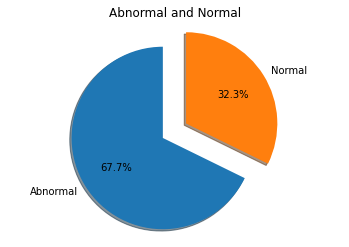

In [26]:
ANON = ANO["class"].count()
NON = NO["class"].count()

labels = "Abnormal","Normal"
sizes = [ANON,NON]
explode = (0, 0.3)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Abnormal and Normal")

plt.show()

In [27]:
# Let's set the data according to the class values

ANO = data[data["class"] == 1]

NO = data[data["class"] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

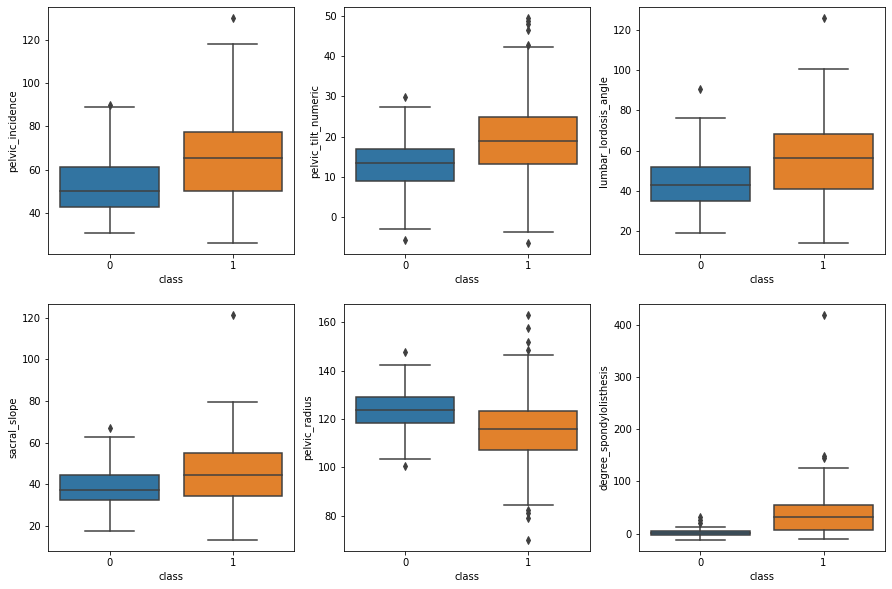

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(231)
sns.boxplot(data["class"],data["pelvic_incidence"])
plt.subplot(232)
sns.boxplot(data["class"],data["pelvic_tilt_numeric"])
plt.subplot(233)
sns.boxplot(data["class"],data["lumbar_lordosis_angle"])
plt.subplot(234)
sns.boxplot(data["class"],data["sacral_slope"])
plt.subplot(235)
sns.boxplot(data["class"],data["pelvic_radius"])
plt.subplot(236)
sns.boxplot(data["class"],data["degree_spondylolisthesis"])

In [32]:
data.corr()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.353336
pelvic_tilt_numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.443687
class,0.353336,0.326063,0.312484,0.210602,-0.309857,0.443687,1.000000


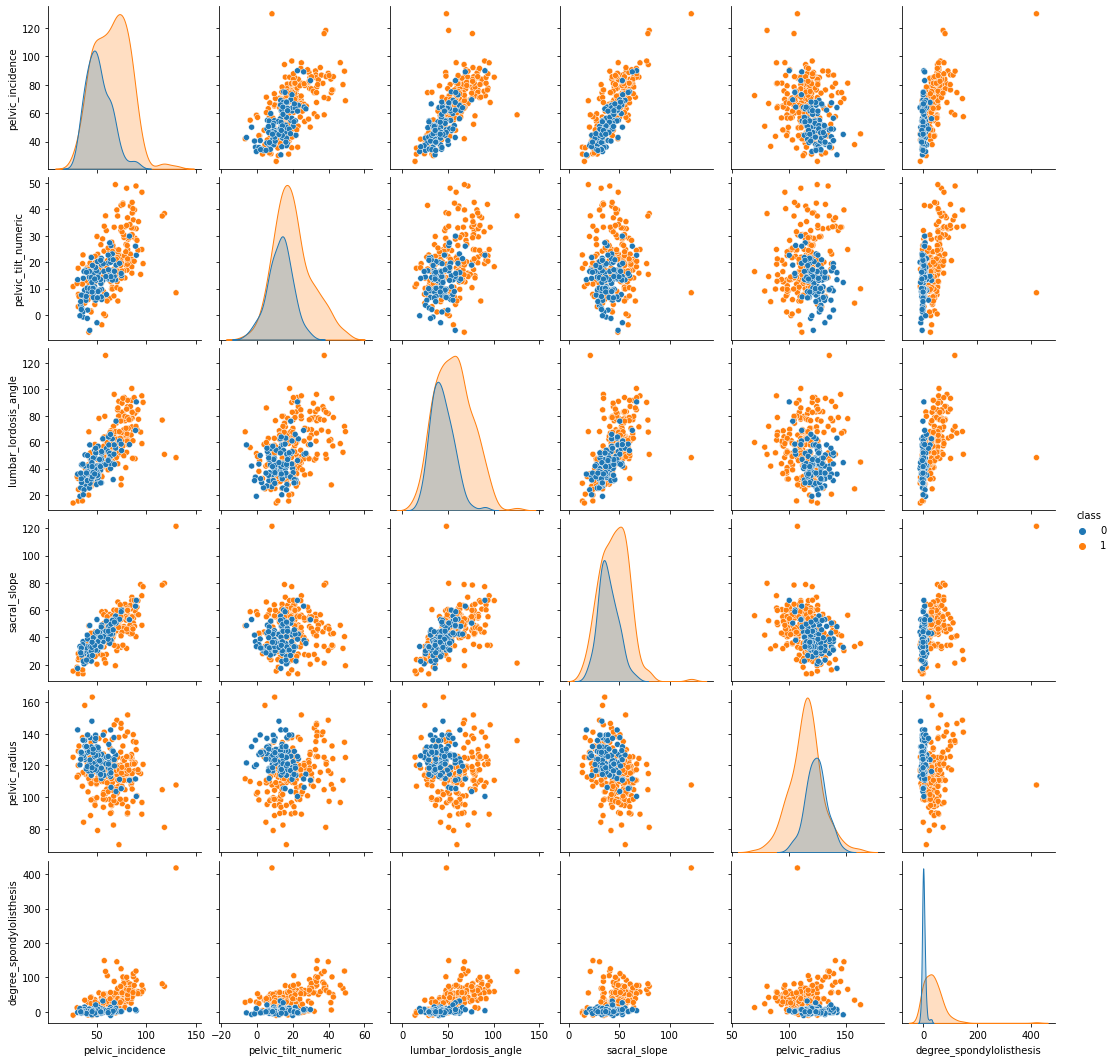

In [33]:
sns.pairplot(data, hue="class")

**TRAINING**

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=43)

In [35]:
# knn model 1

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # k

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
predict = knn.predict(x_test)
predict

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1])

In [37]:
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.8172043010752689 


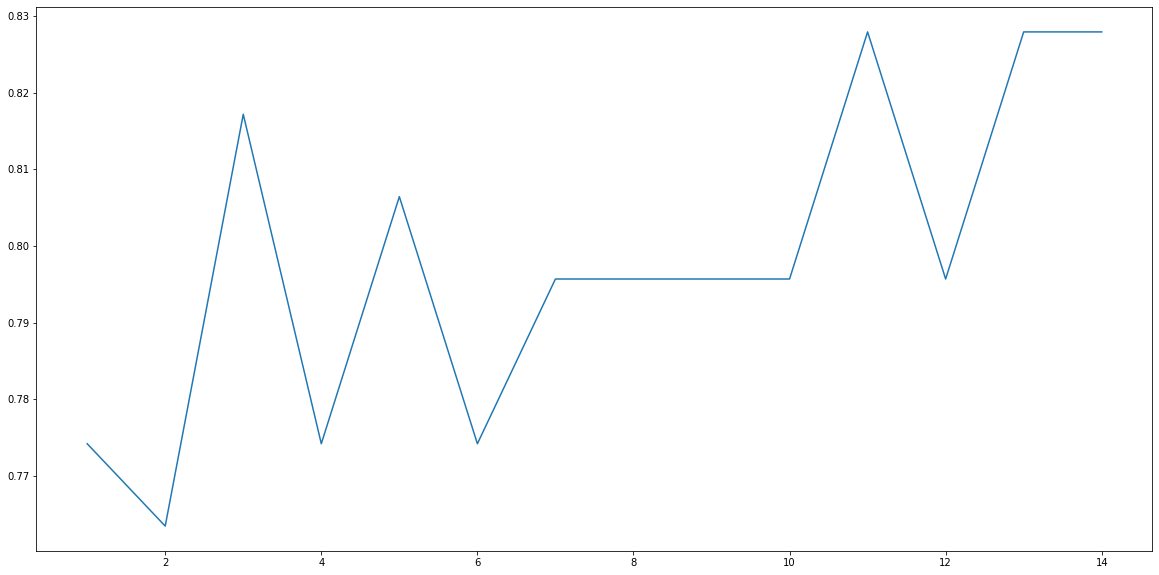

In [38]:
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,15),score_list)

plt.show()

In [39]:
# knn model 2

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11) # k

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [40]:
# predict 2

predict = knn.predict(x_test)
predict

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1])

In [41]:
print(" {} nn score: {} ".format(11,knn.score(x_test,y_test)))

 11 nn score: 0.8279569892473119 


In [42]:
predict

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1])

In [43]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0])

In [44]:
Test = np.concatenate((y_test,predict), axis=0)

Test = Test.reshape(2,93)

Test

array([[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 1]])

In [45]:
x_test

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
294,0.193743,0.296815,0.205831,0.211051,0.623529,0.013869
217,0.115528,0.234208,0.326153,0.168440,0.667096,0.040494
128,0.620778,0.622065,0.499488,0.452280,0.331327,0.162667
167,0.445534,0.410378,0.410489,0.393807,0.000000,0.053843
78,0.397976,0.428632,0.412956,0.338718,0.441360,0.102923
...,...,...,...,...,...,...
62,0.177277,0.285571,0.340068,0.201077,0.695024,0.093493
166,0.297470,0.239861,0.384894,0.340084,0.429037,0.111425
283,0.220358,0.351311,0.338936,0.208353,0.605619,0.026987
301,0.606320,0.582832,0.492394,0.458734,0.445200,0.039850


In [46]:
deger = x_test
deger = deger.reset_index() 
deger["Real_Values"] = ["Abnormal" if each == 0 else "Normal" for each in y_test]
deger["Test_Values"] = ["Abnormal" if each == 0 else "Normal" for each in predict]
deger["Difference"] = -(y_test - predict)

deger

,index,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Real_Values,Test_Values,Difference
0,294,0.193743,0.296815,0.205831,0.211051,0.623529,0.013869,Abnormal,Abnormal,0
1,217,0.115528,0.234208,0.326153,0.168440,0.667096,0.040494,Abnormal,Abnormal,0
2,128,0.620778,0.622065,0.499488,0.452280,0.331327,0.162667,Normal,Normal,0
3,167,0.445534,0.410378,0.410489,0.393807,0.000000,0.053843,Normal,Normal,0
4,78,0.397976,0.428632,0.412956,0.338718,0.441360,0.102923,Normal,Normal,0
...,...,...,...,...,...,...,...,...,...,...
88,62,0.177277,0.285571,0.340068,0.201077,0.695024,0.093493,Normal,Abnormal,-1
89,166,0.297470,0.239861,0.384894,0.340084,0.429037,0.111425,Normal,Normal,0
90,283,0.220358,0.351311,0.338936,0.208353,0.605619,0.026987,Abnormal,Abnormal,0
91,301,0.606320,0.582832,0.492394,0.458734,0.445200,0.039850,Abnormal,Normal,1
